### DATATHON HENRY 

Librerias a utilizar: 

In [1]:
### Librerias
import pandas as pd
import numpy as np

### Data load (Lecutra del archivo "parquet")
import pyarrow.parquet as pq 

### Plott
import matplotlib.pyplot as plt
import seaborn as sns


Carga de dataset de entrenamiento:

In [2]:
train = pq.read_table(r'.\datasets\raw\train.parquet')

In [3]:
train = train.to_pandas()

Dimensiones y primer approach al contenido del dataset

In [4]:
train.shape

(346479, 22)

In [5]:
#Con fines practicos realizamos una particion para conocer las distintas columnas del DF
train.iloc[:,0:10].sample(10)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed
329006,7034496173,https://vermont.craigslist.org/apa/d/burlingto...,vermont,https://vermont.craigslist.org,1850,apartment,1050,1,1.0,1
190522,7049137672,https://charlotte.craigslist.org/apa/d/charlot...,charlotte,https://charlotte.craigslist.org,1099,apartment,624,1,1.0,1
320605,7049325574,https://omaha.craigslist.org/apa/d/omaha-newly...,omaha / council bluffs,https://omaha.craigslist.org,1110,apartment,1170,2,2.0,0
205177,7025720938,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,899,apartment,1023,3,2.0,1
240229,7046976901,https://ogden.craigslist.org/apa/d/kaysville-b...,ogden-clearfield,https://ogden.craigslist.org,960,apartment,801,2,1.0,1
250540,7035940586,https://treasure.craigslist.org/apa/d/port-sai...,treasure coast,https://treasure.craigslist.org,1519,townhouse,1407,3,3.0,1
136554,7049779028,https://sanmarcos.craigslist.org/apa/d/seguin-...,san marcos,https://sanmarcos.craigslist.org,1079,apartment,876,2,2.0,1
175188,7041383308,https://dayton.craigslist.org/apa/d/dayton-wow...,dayton / springfield,https://dayton.craigslist.org,779,apartment,1050,2,1.5,1
102761,7024620742,https://watertown.craigslist.org/apa/d/sackets...,watertown,https://watertown.craigslist.org,950,apartment,840,2,1.0,1
210990,7050009730,https://inlandempire.craigslist.org/apa/d/coro...,inland empire,https://inlandempire.craigslist.org,1890,apartment,901,1,1.0,1


In [6]:
train.iloc[:,10:17].sample(10)

,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
196160,1,0,0,0,0,laundry on site,off-street parking
160531,1,1,0,0,0,laundry in bldg,off-street parking
331318,1,1,0,0,0,None,None
275338,0,0,0,0,1,laundry in bldg,off-street parking
43086,0,1,0,0,0,None,None
330686,1,1,0,0,0,w/d in unit,None
83450,1,1,0,0,0,laundry on site,attached garage
324410,1,1,0,0,0,laundry in bldg,off-street parking
80065,0,1,0,0,0,None,None
149599,1,0,0,0,0,laundry on site,None


In [7]:
train.iloc[:,17:23].sample(10)

,image_url,description,lat,long,state
181340,https://images.craigslist.org/00e0e_773z3eTnLu...,Beds: 1 Baths: 1 Floor Plan: The Trexler Rege...,40.5883,-75.4836,pa
253711,https://images.craigslist.org/00v0v_jnKyHy0ucy...,Award Winning Community Near the Medical Cente...,29.5216,-98.6051,tx
222477,https://images.craigslist.org/00808_4IIEINeCll...,Dorado Ranch is a community offering a great r...,31.9076,-102.2830,tx
94353,https://images.craigslist.org/00H0H_6um4kwfOLq...,Four unit apartment building in the county wit...,36.5484,-82.5618,tn
8617,https://images.craigslist.org/00Z0Z_lNQlpKQOhV...,"GREAT CARMICHAEL, CA HOME! Located near MSJ Ho...",38.6284,-121.3290,ca
179156,https://images.craigslist.org/01616_2ExUx4MrT6...,The Highlands is a great community convenientl...,43.0444,-87.9498,wi
185467,https://images.craigslist.org/00R0R_cyWYoF6Dsl...,Haines Acres is the place to be!!! This adorab...,39.9590,-76.6592,pa
233019,https://images.craigslist.org/00505_gnwEQjDXvH...,Unit Color may vary from picturesWelcome to Pa...,45.4762,-122.7230,or
74773,https://images.craigslist.org/01111_kTkwwDWaJT...,"Specials: Amazing Remodel units, tile backspla...",45.5457,-94.2229,mn
92738,https://images.craigslist.org/00G0G_cJJyoxFLeb...,Welcome Home to Entrada Del Rio Apartments! Se...,32.2901,-110.9490,az


Observamos el tipo de dato de cada columna

In [8]:
train.iloc[:,0:12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               346479 non-null  int64  
 1   url              346479 non-null  object 
 2   region           346479 non-null  object 
 3   region_url       346479 non-null  object 
 4   price            346479 non-null  int64  
 5   type             346479 non-null  object 
 6   sqfeet           346479 non-null  int64  
 7   beds             346479 non-null  int64  
 8   baths            346479 non-null  float64
 9   cats_allowed     346479 non-null  int64  
 10  dogs_allowed     346479 non-null  int64  
 11  smoking_allowed  346479 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 31.7+ MB


In [9]:
train.iloc[:,12:23].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   wheelchair_access        346479 non-null  int64  
 1   electric_vehicle_charge  346479 non-null  int64  
 2   comes_furnished          346479 non-null  int64  
 3   laundry_options          275308 non-null  object 
 4   parking_options          219797 non-null  object 
 5   image_url                346479 non-null  object 
 6   description              346477 non-null  object 
 7   lat                      344757 non-null  float64
 8   long                     344757 non-null  float64
 9   state                    346479 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 26.4+ MB


In [10]:
# Discretizacion/binning de la columma "price" con dos rangos indicados (Rango 1: low: <=999 / Rango 2: > 1000)

#definimos los "bins" para separar
max_price = max(train["price"])
bins = [-1, 999,max_price]
group_names = ["1", "0"]

#Creacion de la columna "category_price" con la categoria correspondiente
train['category_price'] = pd.cut(train['price'], bins = bins, labels=group_names)

In [12]:
train["category_price"].unique()

['0', '1']
Categories (2, object): ['1' < '0']

In [13]:
#Por ultimo dropeamos la columna "price" ya que no era utilizada posteriormente:
train.drop(columns=["price"], inplace=True)

------------------------------------------

### Duplicados:

In [14]:
#Filas duplicadas:
train.duplicated().sum()

0

No existen filas enteras duplicadas

In [15]:
#Buscamos anuncion que se repitan a traves de su descripción ya que el resto de las columnas no nos permiten hacer esta distinción: 
train.duplicated("description").sum()

91488

Pareciera haber 91488 filas donde la descripcion del anuncio se repiten, probablemente en relacion a un mismo inmueble.

Confirmamos si los mismos son efectivamente duplicados:

In [16]:
df = train.loc[train['description'].duplicated(keep=False),'description']
df
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[0]

(85688, 136676, 138914, 174442, 278237)

In [19]:
train.loc[[278237,174442],['lat','description']]

,lat,description
278237,35.7667,"!! LÃ¢rge 3 bedroom Home ~ WASHER/DRYER, STEEL..."
174442,35.8673,"!! LÃ¢rge 3 bedroom Home ~ WASHER/DRYER, STEEL..."


Efectivamente, son duplicados. Procedemos a eliminar los mismos: 

In [20]:
train.shape

(346479, 22)

In [21]:
train.drop_duplicates(subset='description', inplace=True)

In [22]:
train.shape

(254991, 22)

------

Ahora conocemos en porfunidad las columnas con el metodo *describe()*

In [23]:
train.describe(exclude=[object])

,id,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,category_price
count,2.549910e+05,2.549910e+05,254991.000000,254991.000000,254991.000000,254991.000000,254991.000000,254991.000000,254991.000000,254991.000000,253704.000000,253704.000000,254991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149456
mean,7.041000e+09,1.108429e+03,1.932758,1.500467,0.688381,0.669733,0.724994,0.077191,0.013459,0.046041,37.402306,-92.804566,NaN
std,8.983170e+06,2.352589e+04,3.653762,0.627858,0.463156,0.470310,0.446518,0.266895,0.115231,0.209574,5.724401,17.273246,NaN
min,7.003808e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000,NaN
25%,7.035951e+09,7.550000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.480500,-102.124000,NaN
50%,7.043421e+09,9.520000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.037100,-87.836100,NaN
75%,7.048540e+09,1.167000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.396050,-80.889200,NaN


In [24]:
train.describe(exclude=[np.number])

,url,region,region_url,type,laundry_options,parking_options,image_url,description,state,category_price
count,254991,254991,254991,254991,193791,153125,254991,254990,254991,254991
unique,254991,404,413,12,5,7,149363,254990,51,2
top,https://boise.craigslist.org/apa/d/very-nice-b...,rochester,https://saltlakecity.craigslist.org,apartment,w/d in unit,off-street parking,https://images.craigslist.org/00o0o_g5ogc305Nw...,Super cute row house in the Boise bench area. ...,ca,0
freq,1,2732,2345,206490,89679,76855,155,1,23257,149456


price y category_price no entran en juego ya que son el objetivo

- Columnas tipo 1 (apriori no deberian tener impacto en el precio del inmueble): id, url, region_url, image_url
- Columnas tipo 2 (pueden tenre un impacto +/- segun el punto de vista): cats_allowed, dos_allowed, wheelchair_access, electric_vehicle_charge
- Columnas tipo 3 (creeriamos tiene alto impacto en el precio): sqfeet, beds, baths, comes_furnished, lat, long, region, type, laundry_options, parking_options, description, state

Dentro de esto separamos las variables:
- Categoricas: url	region	region_url	type	laundry_options	parking_options	image_url	description	state	category_price
- Numericas: id	price	sqfeet	beds	baths	cats_allowed	dogs_allowed	smoking_allowed	wheelchair_access	electric_vehicle_charge	comes_furnished	lat	long	

In [25]:
#por no encontrarse en relacion con el precio final, decidimos dehacernos de las columnas tipo 1:
#train.drop(columns=["id", "url", "region_url", "image_url"], inplace = True)

-------------

### VALORES FALTANTES

In [26]:
import missingno as msno

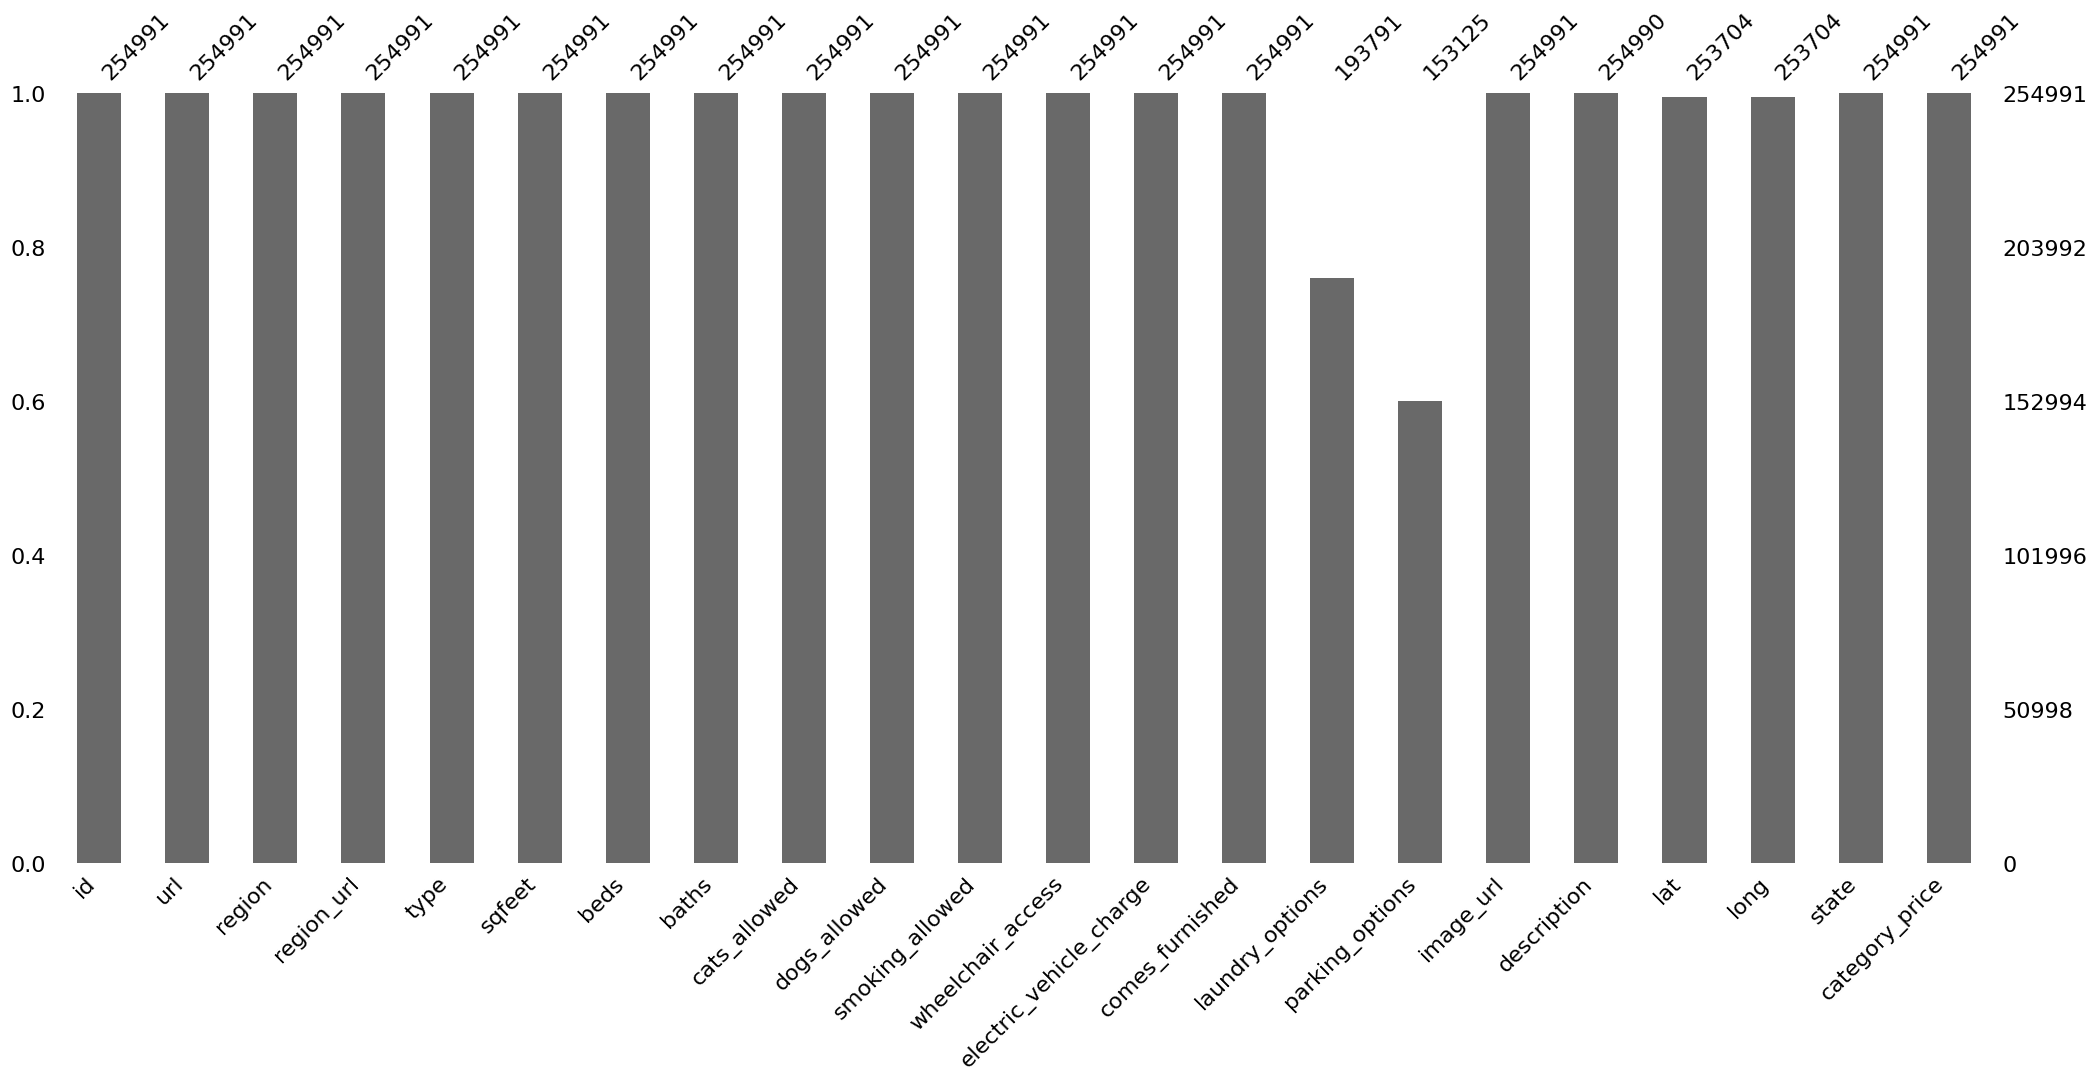

In [27]:
#Analizamos graficamente los datos faltantes:
msno.bar(train)
plt.show()

In [28]:
#Cantidad de datos faltantes segun cada variable
train.isna().sum().sort_values()

id                              0
image_url                       0
comes_furnished                 0
electric_vehicle_charge         0
wheelchair_access               0
state                           0
dogs_allowed                    0
cats_allowed                    0
smoking_allowed                 0
beds                            0
sqfeet                          0
type                            0
region_url                      0
region                          0
url                             0
baths                           0
category_price                  0
description                     1
lat                          1287
long                         1287
laundry_options             61200
parking_options            101866
dtype: int64

Las columnas que cuentan con valores faltantes son "laundry_option""parking_option", "lat", "long y "description"

COLUMNA LAUNDRY_OPTIONS

In [29]:
#Porcentaje de valores faltantes de la variable laundry:
(train.laundry_options.isnull().sum()/len(train))*100


24.00084708872078

24% es considerable, por lo tanto analizamos la posibilidad de trabajar con las categorias dentro de laundry_options

In [30]:
#Valores que toma la variable:
train.laundry_options.value_counts()

w/d in unit           89679
w/d hookups           46447
laundry on site       32607
laundry in bldg       22405
no laundry on site     2653
Name: laundry_options, dtype: int64

Considerando que casi el 50% de los datos indican "w/d in unit" (lavasecaplatos dentro de la unidad) decidimos arbitrariamente separar la columna laundry_options en 3.
- Aquellos con w/d in unit valdran 1
- Aquellos que tengan la posibilidad de conexion (w/d hookups), pero no el dispositivo lavasecaplatos valdra 2
- El resto valdra 3 (aprovechamos y llenamos los nulos con valor = 3)

In [31]:
train.replace({'laundry_options' : { 'w/d in unit' : 1, 'w/d hookups' : 2,  "no laundry on site" : 3 , "laundry on site" : 3, "laundry in bldg" : 3 }}, inplace=True)
train["laundry_options"].fillna(3, inplace = True)

In [32]:
train.laundry_options.value_counts()

3.0    118865
1.0     89679
2.0     46447
Name: laundry_options, dtype: int64

COLUMNA PARKING_OPTIONS

In [33]:
#Porcentaje de valores faltantes de la variable parking:
((train.parking_options.isnull().sum()/len(train))*100)


39.948860940190045

40% es considerable, por lo tanto analizamos la posibilidad de trabajar con las categorias dentro

In [34]:
#Valores que toma la variable:
train.parking_options.value_counts()

off-street parking    76855
attached garage       28497
carport               23153
detached garage       12567
street parking        10800
no parking             1118
valet parking           135
Name: parking_options, dtype: int64

La presencia de un garage propio ("attached garage", "carport", "detached garage", "valet parking") suele ser un determinante a la hora de habalr de inmuebles. Se decide dividir la columna "parking_options" en 3 posibilidades:
- 1: cuenta con garage propio ("attached garage", "carport", "detached garage", "valet parking")
- 2: garage comunitario ("off-street parking")
- 3: sin garage ("street parking", "no parking") 
  
- El resto de los valores nulos seran categorizados como  3 ya que ante la no indicacion de la presencia de garage, se presupone la posibilidad de estacionar en la calle ("street parking")

In [35]:
train.replace({'parking_options' : { "attached garage" : 1, "carport" : 1, "detached garage" : 1, "valet parking" : 1}}, inplace=True)
train.replace({'parking_options' : { "off-street parking" : 2}}, inplace=True)
train.replace({'parking_options' : { "street parking" : 3, "no parking" : 3}}, inplace=True)
train["parking_options"].fillna(3, inplace = True)

COLUMNA "DESCRIPTION"

Cuenta con un solo registro faltante. Dado la corta experiencia en ingenieria de datos y ML, se decide no utilizar esta columna. Se procede a eliminar la misma

In [36]:
train.drop(columns=["description"], inplace = True)

COLUMNA "LAT" Y "LONG"

En relacion a las columnas de geolocalizacion, se decide por comodidad de trabajo conservar unicamente la columna "state". Decidimos (conociendo la perdida de informacion que esto implica, pero a fines de desarrollar un primer modelo) eliminar las columnas: 

"lat", "long", "id", "url", "region", "region_url", "image_url"

In [37]:
train.drop(columns=["lat", "long", "id", "url", "region", "region_url", "image_url"], inplace=True)

In [38]:
#Vemos como viene quedando el dataframe hasta este punto
train.head()

,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,category_price
0,house,1200,2,2.0,1,1,1,0,0,0,1.0,1.0,id,0
1,apartment,694,1,1.0,1,1,1,0,0,0,1.0,1.0,co,0
2,apartment,900,2,2.0,0,0,1,0,0,0,2.0,2.0,va,0
3,house,1469,3,2.0,1,1,1,0,0,0,1.0,3.0,az,0
4,apartment,700,1,1.0,1,1,1,0,0,0,1.0,1.0,tn,1


----

Trabajamos con las columnas que tenemos hasta aqui:

COLUMNA "TYPE"

In [39]:
train["type"].value_counts()

apartment          206490
house               25006
townhouse           10370
condo                4913
duplex               3811
manufactured         2606
cottage/cabin         723
loft                  490
flat                  425
in-law                147
land                    8
assisted living         2
Name: type, dtype: int64

Algunos detalles a tener en cuenta para la categorización:
- 1: apartment, flat (vivencia en estructura en comun?)
- 2: house, townhouse, condo, duplex, manufactured, cottage/cabin, loft, land (Estructura edilicia separada?)
- 3: in-law, assited living (convivencia con terceros en espacio pequeño)

In [40]:
train.replace({'type' : { "apartment" : 1, "flat" : 1}}, inplace=True)
train.replace({'type' : { "house" : 2, "townhouse" : 2, "condo" : 2, "duplex" : 2, "manufactured" : 2, "cottage/cabin" : 2, "loft" : 2,"land" : 2}}, inplace=True)
train.replace({'type' : { "in-law" : 3, "assisted living" : 3}}, inplace=True)

COLUMNAS "DOGS_ALLOWED" Y "CATS_ALLOWED"

Consierando que es extraño encontrar un espacio donde se permita exlusivamente perro o gato, decidimos unificar esta columna para reducir la dimensionalidad del dataset. 

Creamos la columna "animals_allowed" y luego dropeamos cats_allowed y dogs_allowed

In [41]:
train.head()

,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,category_price
0,2,1200,2,2.0,1,1,1,0,0,0,1.0,1.0,id,0
1,1,694,1,1.0,1,1,1,0,0,0,1.0,1.0,co,0
2,1,900,2,2.0,0,0,1,0,0,0,2.0,2.0,va,0
3,2,1469,3,2.0,1,1,1,0,0,0,1.0,3.0,az,0
4,1,700,1,1.0,1,1,1,0,0,0,1.0,1.0,tn,1


In [42]:
train["animals_allowed"] = train["cats_allowed"] + train["dogs_allowed"]
train.replace({'animals_allowed' : { 2 : 1}}, inplace=True)
train.drop(columns=["cats_allowed", "dogs_allowed"], inplace=True)

COLUMNA "STATE"

Utilizamos label_encoder para discretizar

In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['state'] = label_encoder.fit_transform(train['state'])

--------

In [44]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254991 entries, 0 to 346478
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   type                     254991 non-null  int64   
 1   sqfeet                   254991 non-null  int64   
 2   beds                     254991 non-null  int64   
 3   baths                    254991 non-null  float64 
 4   smoking_allowed          254991 non-null  int64   
 5   wheelchair_access        254991 non-null  int64   
 6   electric_vehicle_charge  254991 non-null  int64   
 7   comes_furnished          254991 non-null  int64   
 8   laundry_options          254991 non-null  float64 
 9   parking_options          254991 non-null  float64 
 10  state                    254991 non-null  int32   
 11  category_price           254991 non-null  category
 12  animals_allowed          254991 non-null  int64   
dtypes: category(1), float64(3), int32(1), int64(

C:\Users\amysl\AppData\Local\Temp\ipykernel_32564\1679882036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


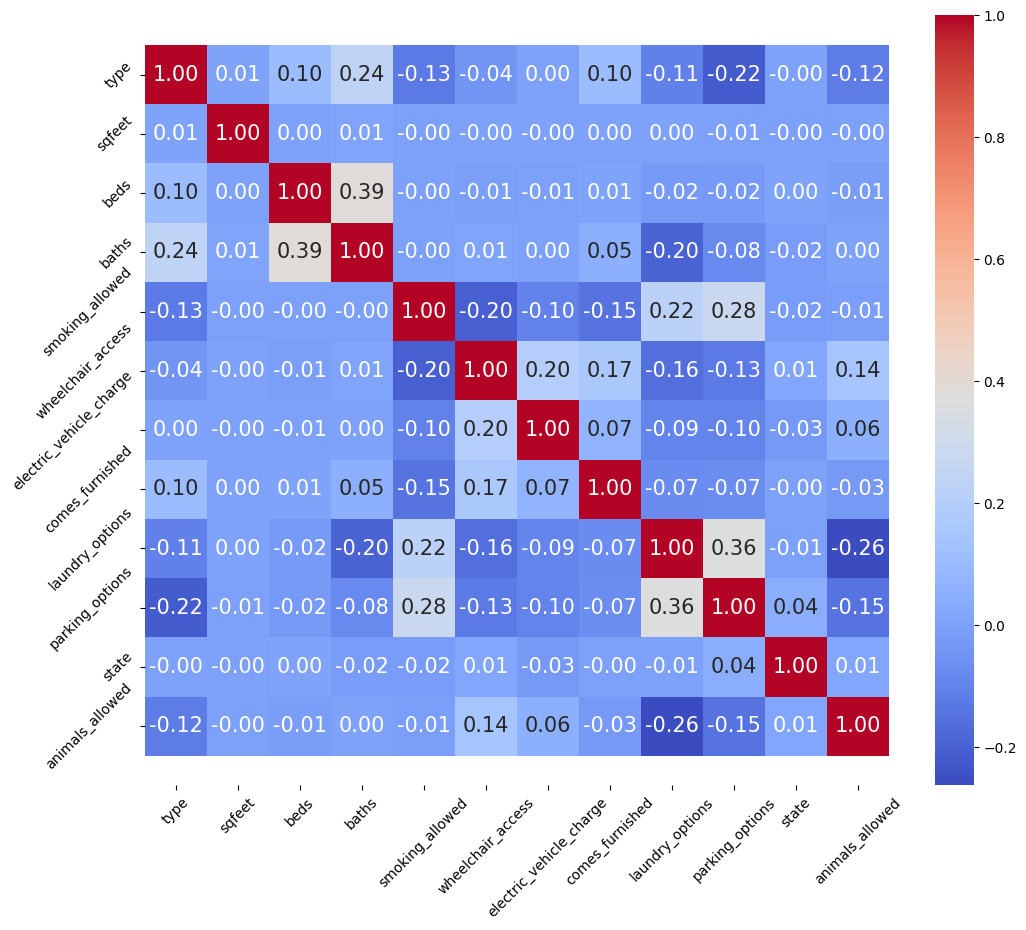

In [46]:
corr = train.corr()
plot_corre_heatmap(corr)

--------

MODELOS:

In [190]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import clear_output

#instancio con depth=5. luego jugar!
tree = DecisionTreeClassifier(max_depth = 15, random_state = 42) 


In [191]:
#División de dataset en train y test utilizando train_test_split:
#Remuevo de X a variable target:
X = train.drop(columns= ["category_price"], axis=1)
#Adjunto en Y el target:
y = train['category_price']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.20, random_state=42) 

In [192]:
# Entreno el modelo:

tree.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [193]:
#evaluo recall:
print(tree.classes_)
print(tree.n_classes_)
print(tree.max_features_)
print(tree.feature_importances_)

# la predicccion:
y_pred = tree.predict(X.values)

print(f"Acurracy: {accuracy_score(y,y_pred)}")
#print(recall_score(y,y_pred))

['0' '1']
2
12
[0.01826781 0.3156879  0.03804049 0.04690032 0.02234164 0.00771251
 0.00127756 0.01259918 0.10801432 0.0322319  0.37597738 0.02094898]
Acurracy: 0.8800467467479245


In [194]:
test = pq.read_table(r'.\datasets\raw\test.parquet')

In [195]:
test = test.to_pandas()

In [196]:
#Columna laundry_options
test.replace({'laundry_options' : { 'w/d in unit' : 1, 'w/d hookups' : 2,  "no laundry on site" : 3 , "laundry on site" : 3, "laundry in bldg" : 3 }}, inplace=True)
test["laundry_options"].fillna(3, inplace = True)

#Columna parking_options
test.replace({'parking_options' : { "attached garage" : 1, "carport" : 1, "detached garage" : 1, "valet parking" : 1}}, inplace=True)
test.replace({'parking_options' : { "off-street parking" : 2}}, inplace=True)
test.replace({'parking_options' : { "street parking" : 3, "no parking" : 3}}, inplace=True)
test["parking_options"].fillna(3, inplace = True)

#Borrado de columnas sin utilizar:
test.drop(columns=["description"], inplace = True)
test.drop(columns=["lat", "long", "id", "url", "region", "region_url", "image_url"], inplace=True)

#Columna "type":
test.replace({'type' : { "apartment" : 1, "flat" : 1}}, inplace=True)
test.replace({'type' : { "house" : 2, "townhouse" : 2, "condo" : 2, "duplex" : 2, "manufactured" : 2, "cottage/cabin" : 2, "loft" : 2,"land" : 2}}, inplace=True)
test.replace({'type' : { "in-law" : 3, "assisted living" : 3}}, inplace=True)

#Columnas "dogs_allowed" y "cats_allowed" + creacion de "animals_allowed"
test["animals_allowed"] = test["cats_allowed"] + test["dogs_allowed"]
test.replace({'animals_allowed' : { 2 : 1}}, inplace=True)
test.drop(columns=["cats_allowed", "dogs_allowed"], inplace=True)

#Columna "State"
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test['state'] = label_encoder.fit_transform(test['state'])

In [197]:
train.shape

(254991, 13)

In [198]:
test.shape

(38498, 12)

In [199]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     38498 non-null  int64  
 1   sqfeet                   38498 non-null  int64  
 2   beds                     38498 non-null  int64  
 3   baths                    38498 non-null  float64
 4   smoking_allowed          38498 non-null  int64  
 5   wheelchair_access        38498 non-null  int64  
 6   electric_vehicle_charge  38498 non-null  int64  
 7   comes_furnished          38498 non-null  int64  
 8   laundry_options          38498 non-null  float64
 9   parking_options          38498 non-null  float64
 10  state                    38498 non-null  int32  
 11  animals_allowed          38498 non-null  int64  
dtypes: float64(3), int32(1), int64(8)
memory usage: 3.4 MB


In [200]:
X=test
y_final=tree.predict(X.values)

In [201]:
prediction  = pd.DataFrame(y_final, columns=['pred'])

In [202]:
test

,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,animals_allowed
0,2,1344,3,2.0,1,0,0,0,1.0,2.0,22,0
1,1,1050,2,1.0,1,0,0,0,2.0,2.0,46,0
2,1,1150,2,2.0,1,1,0,0,1.0,1.0,22,1
3,1,1280,2,2.5,0,0,0,0,1.0,1.0,5,1
4,1,783,2,1.0,1,0,0,0,3.0,3.0,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38493,1,1180,2,2.0,0,1,0,0,1.0,1.0,1,1
38494,1,1138,3,2.0,1,0,0,0,2.0,2.0,43,1
38495,1,743,1,1.0,1,0,0,0,1.0,2.0,9,1
38496,2,1276,3,2.0,0,0,0,0,2.0,1.0,3,0


In [203]:
prediction

,pred
0,0
1,0
2,0
3,0
4,0
...,...
38493,0
38494,1
38495,0
38496,0


In [204]:
prediction.to_csv('amysler.csv', index=False)

In [205]:
prediction["pred"].value_counts()

0    20989
1    17509
Name: pred, dtype: int64